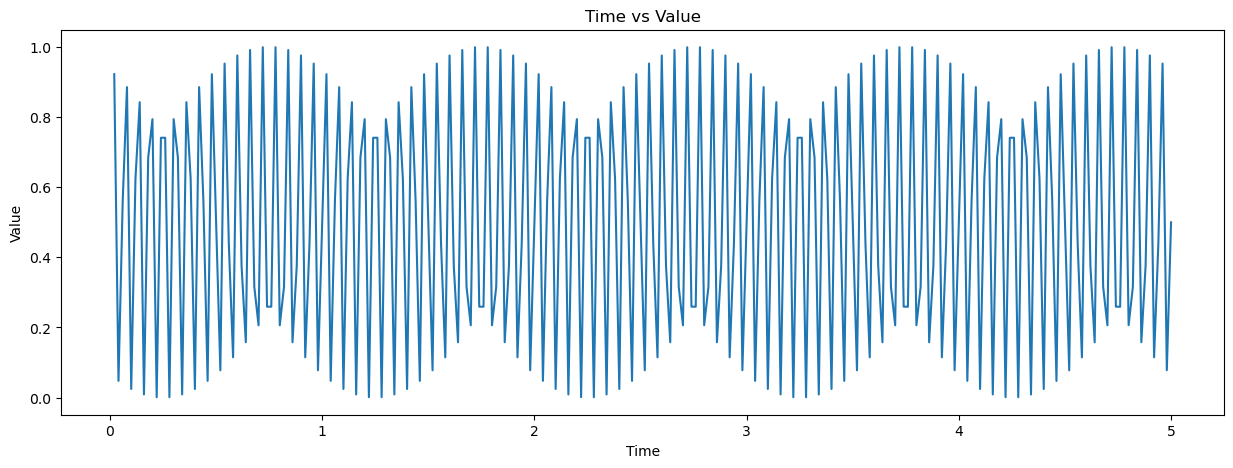

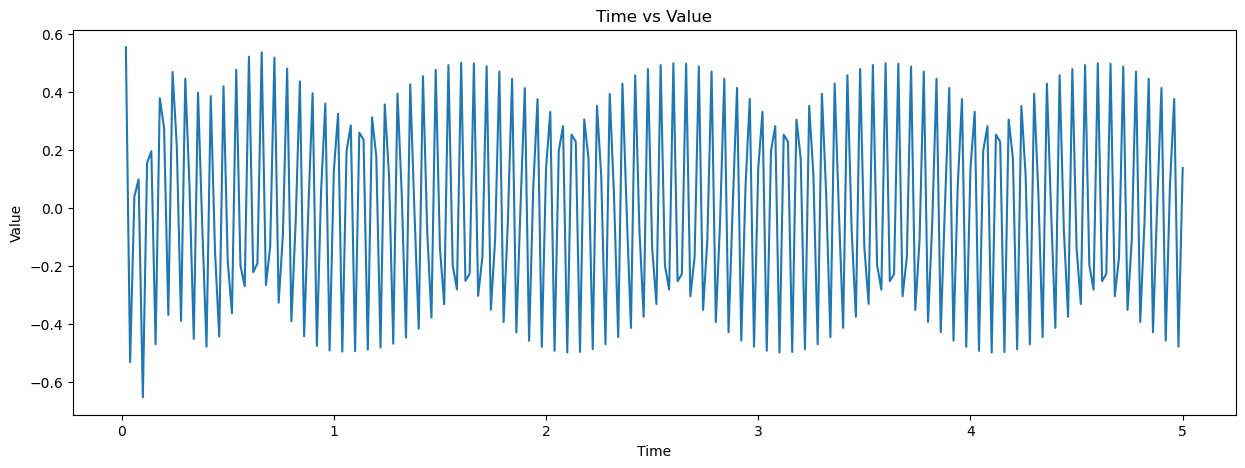

In [16]:
import csv
import matplotlib.pyplot as plt

path = "/Users/barci/Downloads/Experiment2_Marker.csv"
# Read the CSV file
with open(path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    time = []
    value = []
    start_time = None
    for row in reader:
        if len(row) == 2 and row[0].replace(".", "").isdigit() and row[1].replace(".", "").isdigit():
            # Extract time and value columns
            time.append(float(row[0]))
            value.append(float(row[1]))
        elif len(row) == 2 and row[1] == 'start':
            # Update start_time for new experiment
            start_time = float(row[0])
        elif len(row) == 1 and row[0].replace(".", "").isdigit() and start_time is not None:
            # Extract time and value columns for experiments
            time.append(float(row[0]) + start_time)
            row = next(reader)  # Skip the next row after the 'start' row
            value.append(float(row[0]))
            start_time = None

# Plot time vs value
plt.figure(figsize=(15, 5))
#do a low pass filer on the value

plt.plot(time, value)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time vs Value')
plt.show()